# Face detection using HAAR Cascades

* It was first introduced by Paul Viola & Michael Jones at 2001 (see http://www.vision.caltech.edu/html-files/EE148-2005-Spring/pprs/viola04ijcv.pdf)
* The Viola Jones framework can detect any object , but was initially aimed at face detection
* please note we are talking about face detection (based on machine learning), and not face recognition (based on deep learning).


## some clarifications on AI terminology
### Artificial Intelligence (AI): 
Its when a machine has cognitive capabilities such as problem solving and learning from examples (3 areas reasoning , speach and vision)
AI has 3 different levels:
* Narrow AI = when a machine can perform a specific task better than a human
* General AI = when a machine can perform any intelectual task as a human would perform
* Strong AI = when a machine can perform better than humans in lots of tasks

### Machine learning:
Started at the late 20th century - can be referred to as supervised learning when algorithms are trained to perform a task based on past examples. 
This is the place where most of todays applications are at.
### Deep learning:
a subset of Machine learning and it uses a "deep nural networks" (vs shallow neural networks)





## The building blocks of Viola-Jones algorithm:
### * Haar features

![title](images/haar-features2.png)

#### calculating whether an area containes a feature (here we check edge)

![title](images/haar-edge-calculation.jpg)


see https://www.youtube.com/watch?v=F5rysk51txQ


### * Integral image

![title](images/Integral-image.png)



see https://www.youtube.com/watch?v=x41KFOFGnUE

### * Adaboosts 

AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire. Its purpose is to build and train the model that identifies the face (or any object). It is used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. 

see https://www.youtube.com/watch?v=GM3CDQfQ4sw

### * Cascading

Cascade classifies are a concatenation of weak classifiers used to create a strong classifier.<BR>
simple classifiers - are HAAR features which are not so accurate and easy to compute<BR>
Strong classifier  - is acheived by concatenating a searies of weak classifiers to create a strong classifier<BR>
<BR>
How it works - https://www.youtube.com/watch?v=nVbaNcRldmw&feature=youtu.be
<BR>
<BR>
A summary video - https://www.youtube.com/watch?v=0WBUlRADBd0&feature=youtu.be

# And now some coding 

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
hillary = cv2.imread('images/face1.jpg', cv2.IMREAD_GRAYSCALE)
obama = cv2.imread('images/face_obama.jpg', cv2.IMREAD_GRAYSCALE)
bearded_guy = cv2.imread('images/face_beard_sunglasses.jpg', cv2.IMREAD_GRAYSCALE)
group1 = cv2.imread('images/people.jpg', cv2.IMREAD_GRAYSCALE)
group2 = cv2.imread('images/people_face_to_find_1.jpg', cv2.IMREAD_GRAYSCALE)

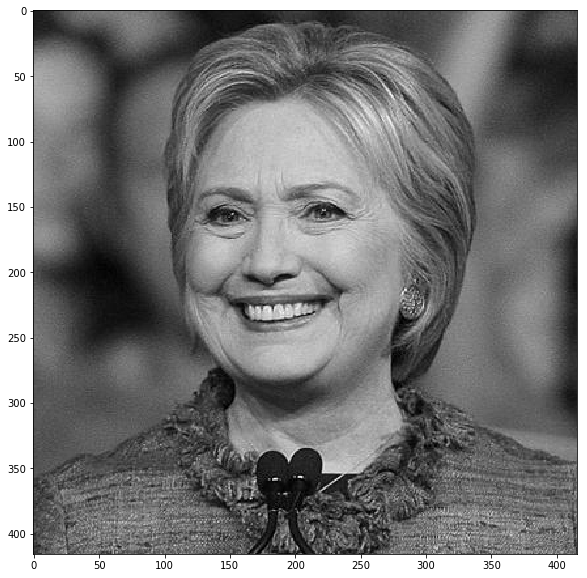

In [4]:
display(hillary)

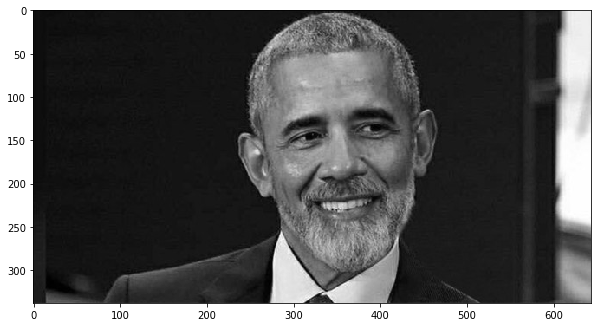

In [5]:
display(obama)

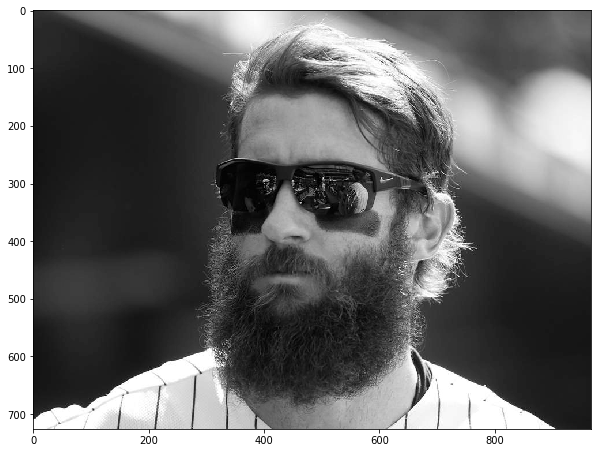

In [6]:
display(bearded_guy)

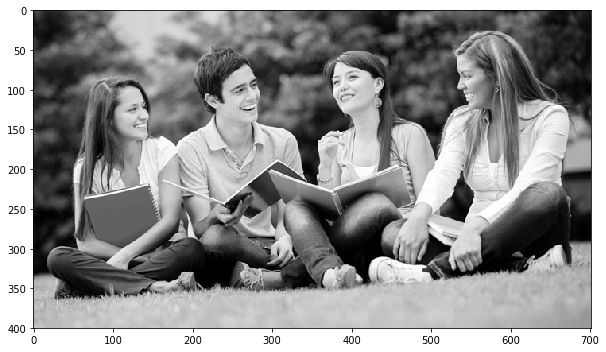

In [7]:
display(group1)

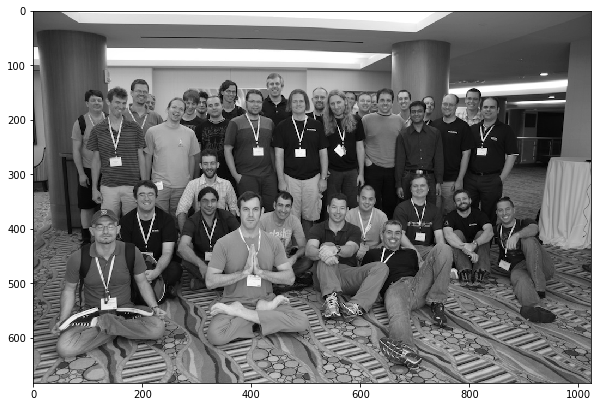

In [8]:
display(group2)

## Cascade files

OpenCV comes with some pre-trained cascade files and we will use them here.
in this project these are stored under the resources directory



In [9]:
face_cascade = cv2.CascadeClassifier('resources/haarcascade_frontalface_default.xml')

In [10]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) 
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 2) 
    return face_img

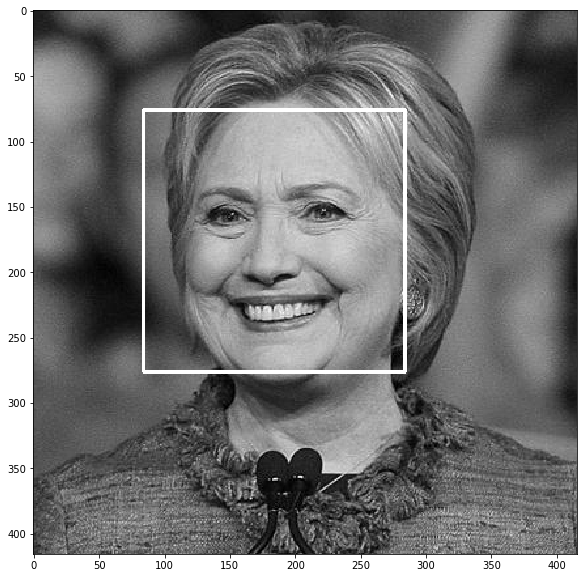

In [11]:
result = detect_face(hillary)
display(result)

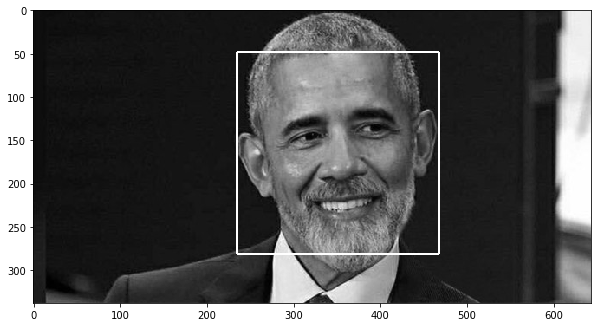

In [12]:
result = detect_face(obama)
display(result)

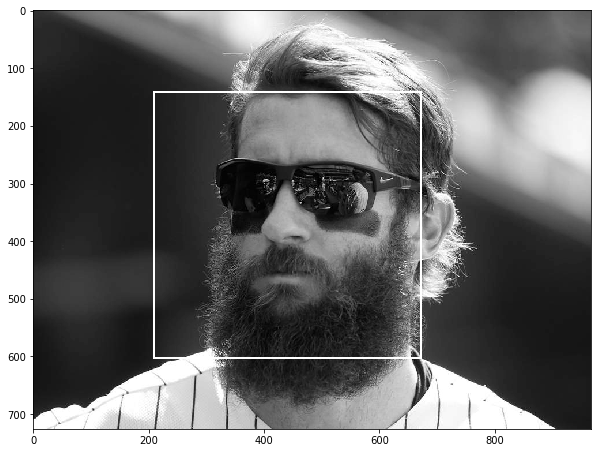

In [13]:
result = detect_face(bearded_guy)
display(result)

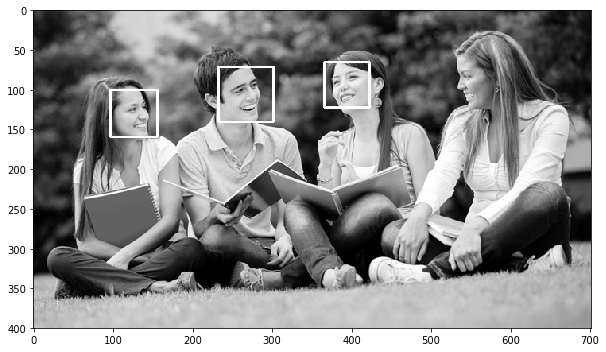

In [14]:
result = detect_face(group1)
display(result)

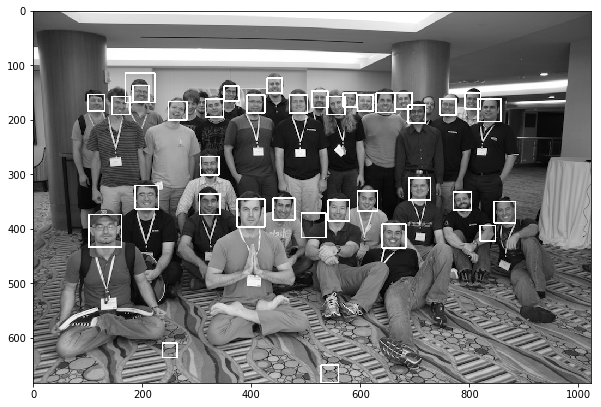

In [15]:
result = detect_face(group2)
display(result)

In [16]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5) 
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 2) 
    return (len(face_rects),face_img)

25


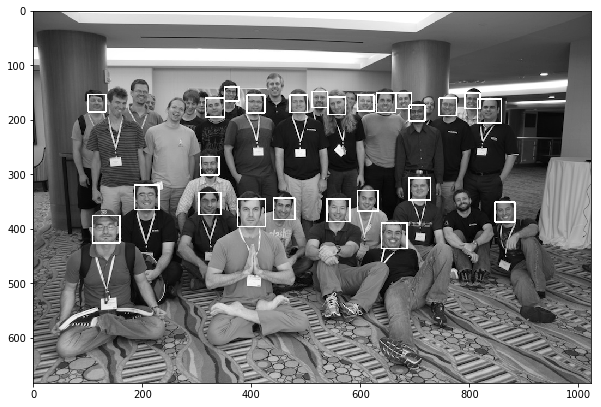

In [17]:
recs, result = adj_detect_face(group2)
print(recs)
display(result)